## Conservation of energy in Hénon-Heiles sytem

# TOO UNSTABLE FOR THIS METHOD (plus it's not the focus...)

Hénon-Heiles system ODE

$$
\begin{aligned}
\ddot{y_1}(t) &= -y_1(t)-2y_1(t)y_2(t),\\
\ddot{y_2}(t) &= y_2^2(t)-y_2(t)-y_1^2(t).
\end{aligned}
$$

Recalling the definition of the Hamiltonian

$$
H(p,q) = \bigg[\frac{1}{2}(p_1^2+p_2^2)\bigg]+\bigg[\frac{1}{2}(q_1^2+q_2^2)+q_1^2q_2-\frac{1}{3}q_2^3\bigg],
$$

we know that it holds true that, for all $t$

$$
g(\dot{y}(t), y(t)) \triangleq H(\dot{y}(t), y(t))-H(\dot{y}_0(t),y_0(t))=0
$$

The Hamiltonian represents the total energy of the system at hand. We define the Hamiltonian and its Jacobian, plus the ODE system that actually generates the data. For the moment, we will convert it to a first-order ODE.

$$
\begin{aligned}
\dot{y_1}(t) &= y_3(t),   \\
\dot{y_2}(t) &= y_4(t), \\
\dot{y_3}(t) &=  -y_1(t)-2y_1(t)y_2(t), \\
\dot{y_4}(t) &= y_2^2(t)-y_2(t)-y_1^2(t).

\end{aligned}
$$

In [32]:
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
import sympy as sp
from ekf_vindy.plotting import plotter
from ekf_vindy.utils import add_noise_with_snr
from ekf_vindy.filters.state import State
from ekf_vindy.filters.ekf import EKF
from scipy.integrate import odeint

np.random.seed(1000)

"""
Our convention is state = [x_0, x_1, dx_0, dx_1] (not including SINDy parameters)
"""
def hamiltonian(p, q):
    kinetic_energy = 0.5 * np.sum(p**2)
    potential_energy = 0.5 * np.sum(q**2) + q[0]**2 * q[1] - (1/3) * q[1]**3
    
    return kinetic_energy + potential_energy

def jacobian_constraint(state: State):
    x = state.x.ravel()
    p = x[0:2] 
    q = x[2:-1]     
    
    dH_dp = p
    dH_dq = np.array([q[0] + 2 * q[0] * q[1], q[1] + q[0]**2 - q[1]**2])
    return np.array([dH_dp, dH_dq]).reshape(1, -1)
    
def henon_heiles(x, t):
    return np.array([x[2], x[3], -x[0] - 2 * x[0] * x[1], -x[1] - x[0]**2 + x[1]**2])



Generate trajectories with HH system. We start from random initial conditions (recall that the velocity vector, in this case is also a free parameter).

/tmp/ipykernel_4779/1121225461.py:6: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  x_train = np.array([odeint(henon_heiles, x0, time_instances) for x0 in x_0])


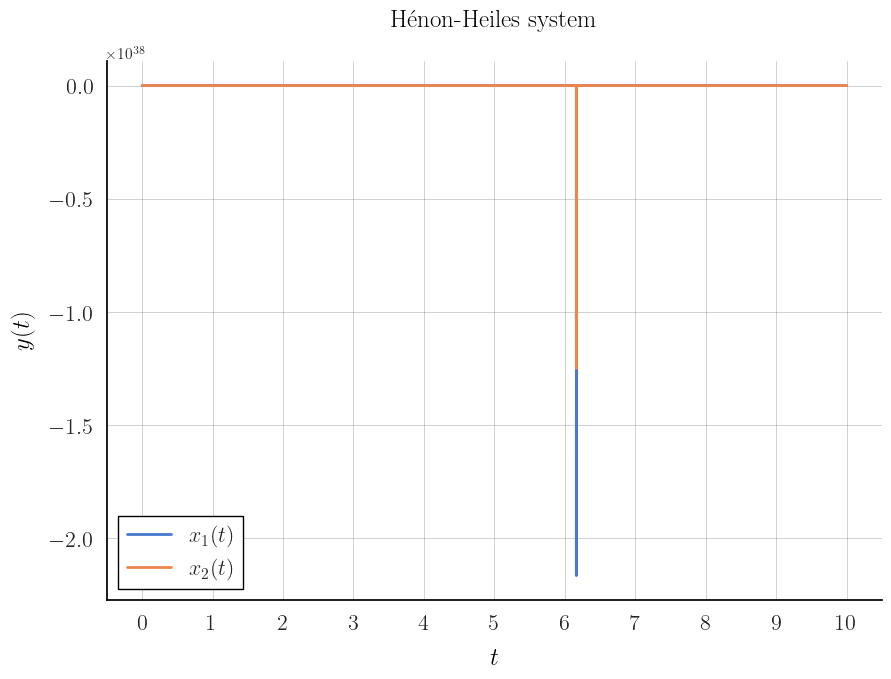

In [ ]:
# consider 20 trajectories, with 20 random ICs (for training with SINDy)
n_train = 20

x_0 = np.random.normal(0, 0.5, (n_train, 4))
time_instances = np.arange(0, 10, 0.001)
x_train = np.array([odeint(henon_heiles, x0, time_instances) for x0 in x_0])

fig, ax = plotter.plot_trajectory(x_train[0, :, 2:4], time_instances, title='Hénon-Heiles system')
plt.show()

